# 資料處理流程
* 讀取資料集
* 檢查是否有重複的資料 -> 刪除重複的
* 看資料集「事實」及「刑期」的分布
* 去除掉異常值
* 儲存資料集

# Load Dataset

In [1]:
import json

with open('dataset_origin/all_data.json', 'r', encoding='utf-8') as f:
    old_data = json.load(f)

with open('dataset/all_data.json', 'r', encoding='utf-8') as f:
    all_data = json.load(f)

In [2]:
print(f"=" *10 + " All Dataset " + "=" *10)
print("Key: ", old_data[0].keys())
print("Size: ", len(old_data))

print(f"=" *10 + " All Dataset " + "=" *10)
print("Key: ", all_data[0].keys())
print("Size: ", len(all_data))

========== All Dataset ==========
Key:  dict_keys(['id', 'reason', 'sentance', 'fact'])
Size:  763
========== All Dataset ==========
Key:  dict_keys(['id', 'reason', 'sentance', 'fact'])
Size:  720


# 檢查是否有重複的資料

In [3]:
repeat_list = []

fact_id_mapping = {}

for data in all_data:
    fact = data['fact']
    data_id = data['id']
    if fact in fact_id_mapping:
        print(f"Fact {fact}")
        print(f"ID1: {fact_id_mapping[fact]}")
        print(f"ID2: {data_id}")
        repeat_list.append(data_id)
        print(f'='*50)
    else:
        fact_id_mapping[fact] = data_id

print("Repeat List:", repeat_list)

Fact 一、曹鳳珠與林寶櫳前為夫妻，因曹鳳珠認為林寶櫳與曹丞君間有不正常的交往關係，2人因此感情生變，遂於民國（下同）99年3月1日在福建連江地方法院調解離婚。詎曹鳳珠為取得保護及教養子女之權利，竟基於行使偽造私文書之犯意，先於某不詳時間、地點，偽造曹丞君簽名及日期94年5月10日之切結書（內容為本人曹丞君因與有婦之夫林寶櫳不正常的密切通聯，被林寶櫳老婆查獲，進而告之本人老公陳葦丞，為求兩家息事寧人，本人在媽媽及姐姐見證下，於姐姐家簽下切結書給林寶櫳老婆曹鳳珠，並保證今後不再與林寶櫳來往，若再被抓到願依妨害家庭處理，此致曹鳳珠）1份，再於99年5月3日，向福建連江地方法院具狀提出而行使之，希冀以此方式取得對子女保護及教養之權利，而足生損害於曹丞君。嗣因林寶櫳於99年5月5日在福建連江地方法院閱卷時，發現上開切結書而向曹丞君詢問，經曹丞君否認後，始查悉上情。二、曹鳳珠因認定係曹丞君介入其與林寶櫳間之婚姻，導致2人離婚，而對曹丞君心懷怨懟，竟基於毀損他人名譽之犯意，先後分別於99年11月5日凌晨4時43分許、100年1月10日上午10時2分許，在其位於連江縣南竿鄉馬祖村85號住處，以SKYPE網路帳號tina900928號，經由網路家庭國際資訊股份有限公司(即PChomeOnline)簡訊系統及米瑟奇網路簡訊平台散佈內容各為「號外！議會之光，春光外洩，曹妓員於11月5日凌晨二點，在神農山莊的休旅車上，與神農山莊王經理幽會長達兩個半小時......。」（下稱簡訊1）、「議員之恥！馬祖之惡！坐領高薪不夠用，議員兼作雞員，曹妓員1月8日深夜三點直奔神農山莊作應召，服務的對象是林姓警員，警紀敗壞蕩然無存；乾爹乾哥變成表哥表弟，破壞別人幸福家庭妻離子散，十惡不赦！罪大惡極！！正義之士群起躂閥！！」（下稱簡訊2）等涉及曹丞君私德而不具公共利益關聯性之事，足以詆毀曹丞君名譽之簡訊。嗣曹丞君陸續接獲他人來電告知收到上開簡訊，始知悉上情。三、案經曹丞君分別告訴及訴由福建省連江縣警察局移送福建連江地方法院檢察署檢察官偵查起訴。理由一、按被告以外之人於審判外之陳述，雖不符刑事訴訟法第159條之1至第159條之4之規定，而經當事人於審判程序同意作為證據，法院審酌該言詞陳述或書面陳述作成時之情況，認為適當者，亦得為證據。當事人、代理人或辯護人於法院調查證據時，知有第159條第1項不得為證據之情

In [4]:
for data in all_data:
    if data['id'] in repeat_list:
        print(data)

{'id': 'GVHAFo0BlrB_n9qT3neR', 'reason': '偽造文書', 'sentance': 150, 'fact': '一、曹鳳珠與林寶櫳前為夫妻，因曹鳳珠認為林寶櫳與曹丞君間有不正常的交往關係，2人因此感情生變，遂於民國（下同）99年3月1日在福建連江地方法院調解離婚。詎曹鳳珠為取得保護及教養子女之權利，竟基於行使偽造私文書之犯意，先於某不詳時間、地點，偽造曹丞君簽名及日期94年5月10日之切結書（內容為本人曹丞君因與有婦之夫林寶櫳不正常的密切通聯，被林寶櫳老婆查獲，進而告之本人老公陳葦丞，為求兩家息事寧人，本人在媽媽及姐姐見證下，於姐姐家簽下切結書給林寶櫳老婆曹鳳珠，並保證今後不再與林寶櫳來往，若再被抓到願依妨害家庭處理，此致曹鳳珠）1份，再於99年5月3日，向福建連江地方法院具狀提出而行使之，希冀以此方式取得對子女保護及教養之權利，而足生損害於曹丞君。嗣因林寶櫳於99年5月5日在福建連江地方法院閱卷時，發現上開切結書而向曹丞君詢問，經曹丞君否認後，始查悉上情。二、曹鳳珠因認定係曹丞君介入其與林寶櫳間之婚姻，導致2人離婚，而對曹丞君心懷怨懟，竟基於毀損他人名譽之犯意，先後分別於99年11月5日凌晨4時43分許、100年1月10日上午10時2分許，在其位於連江縣南竿鄉馬祖村85號住處，以SKYPE網路帳號tina900928號，經由網路家庭國際資訊股份有限公司(即PChomeOnline)簡訊系統及米瑟奇網路簡訊平台散佈內容各為「號外！議會之光，春光外洩，曹妓員於11月5日凌晨二點，在神農山莊的休旅車上，與神農山莊王經理幽會長達兩個半小時......。」（下稱簡訊1）、「議員之恥！馬祖之惡！坐領高薪不夠用，議員兼作雞員，曹妓員1月8日深夜三點直奔神農山莊作應召，服務的對象是林姓警員，警紀敗壞蕩然無存；乾爹乾哥變成表哥表弟，破壞別人幸福家庭妻離子散，十惡不赦！罪大惡極！！正義之士群起躂閥！！」（下稱簡訊2）等涉及曹丞君私德而不具公共利益關聯性之事，足以詆毀曹丞君名譽之簡訊。嗣曹丞君陸續接獲他人來電告知收到上開簡訊，始知悉上情。三、案經曹丞君分別告訴及訴由福建省連江縣警察局移送福建連江地方法院檢察署檢察官偵查起訴。理由一、按被告以外之人於審判外之陳述，雖不符刑事訴訟法第159條之1至第159條之4之規定，而經當事人於審判程序同意作為證據，

In [6]:
with open('dataset/all_data_new.json', 'r', encoding='utf-8') as f:
    all_data = json.load(f)

print(f"=" *10 + " New Dataset " + "=" *10)
print("Key: ", all_data[0].keys())
print("Size: ", len(all_data))

========== New Dataset ==========
Key:  dict_keys(['id', 'reason', 'sentance', 'fact'])
Size:  706


# Fact Length Distribution

In [7]:
old_fact_len = []

for data in old_data:
    old_fact_len.append(len(data['fact']))

print(f"=" *10 + " Old Dataset " + "=" *10)
print("Length: ", len(old_fact_len))
print("Max Length: ", max(old_fact_len))
print("Min Length: ", min(old_fact_len))
print("Avg. Length: ", sum(old_fact_len) / len(old_fact_len))

fact_len = []

for data in all_data:
    fact_len.append(len(data['fact']))

print(f"=" *10 + " All Dataset " + "=" *10)
print("Length: ", len(fact_len))
print("Max Length: ", max(fact_len))
print("Min Length: ", min(fact_len))
print("Avg. Length: ", sum(fact_len) / len(fact_len))

========== Old Dataset ==========
Length:  763
Max Length:  54049
Min Length:  280
Avg. Length:  8758.266055045871
========== All Dataset ==========
Length:  706
Max Length:  19745
Min Length:  280
Avg. Length:  7932.069405099151


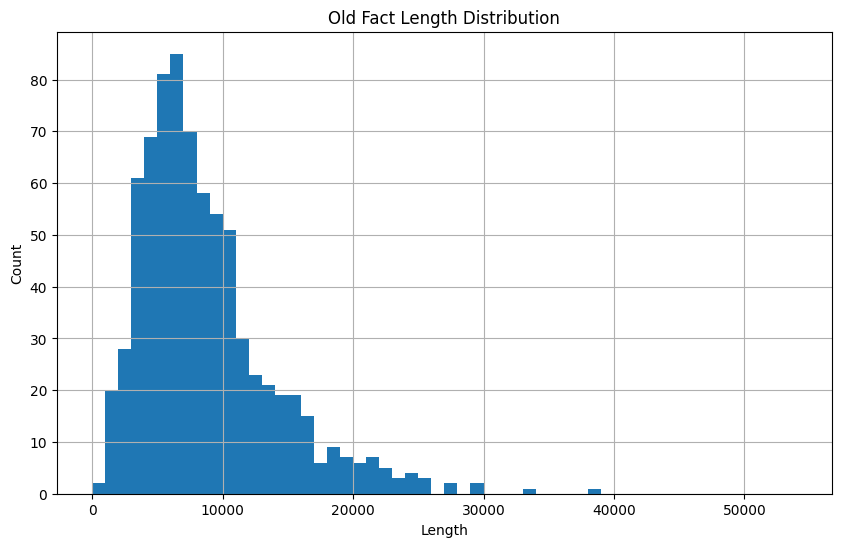

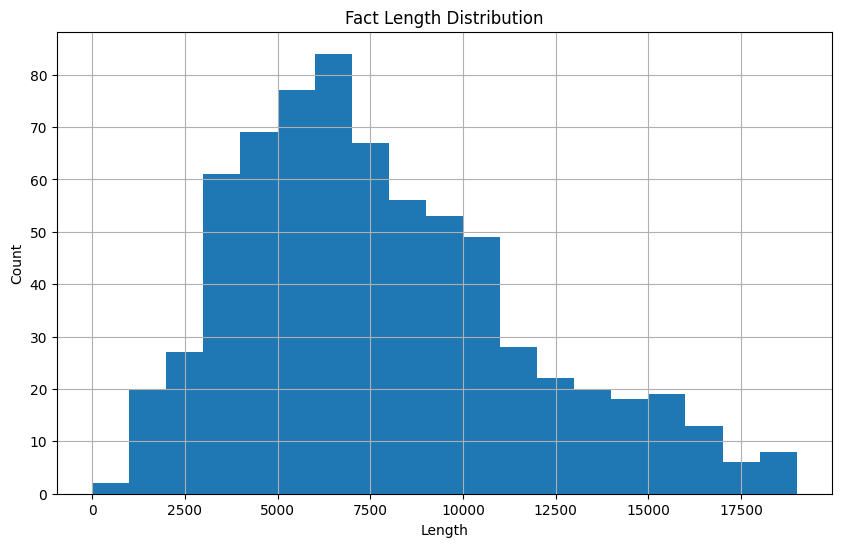

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(old_fact_len, bins=range(0, 55000, 1000))
plt.title('Old Fact Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(fact_len, bins=range(0, 20000, 1000))
plt.title('Fact Length Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Sentence Distribution

In [9]:
old_sentence = []

for data in old_data:
    old_sentence.append(data['sentance'])

print(f"=" *10 + " Old Dataset " + "=" *10)
print("Sentence: ", old_sentence)
print("Max Length: ", max(old_sentence))
print("Min Length: ", min(old_sentence))
print("Avg. Length: ", sum(old_sentence) / len(old_sentence))

sentence = []

for data in all_data:
    sentence.append(data['sentance'])

print(f"=" *10 + " All Dataset " + "=" *10)
print("Length: ", sentence)
print("Max Length: ", max(sentence))
print("Min Length: ", min(sentence))
print("Avg. Length: ", sum(sentence) / len(sentence))

========== Old Dataset ==========
Sentence:  [150, 90, 120, 150, 102, 180, 578, 240, 638, 98, 300, 180, 143, 90, 180, 150, 30, 90, 150, 730, 90, 425, 210, 210, 120, 302, 365, 348, 180, 180, 120, 240, 180, 50, 150, 180, 242, 150, 150, 150, 60, 90, 120, 90, 75, 120, 120, 60, 75, 120, 50, 90, 60, 240, 60, 365, 90, 20, 240, 90, 90, 50, 90, 120, 80, 120, 30, 146, 38, 150, 150, 180, 0, 1056, 180, 90, 60, 120, 180, 120, 180, 90, 180, 60, 90, 40, 1030, 120, 60, 60, 150, 240, 425, 180, 135, 240, 150, 240, 146, 50, 210, 505, 150, 90, 75, 150, 240, 150, 545, 365, 300, 120, 120, 425, 300, 90, 60, 130, 180, 120, 300, 105, 240, 635, 120, 210, 143, 120, 240, 120, 120, 110, 130, 971, 90, 90, 240, 60, 120, 270, 90, 300, 135, 300, 240, 150, 120, 120, 365, 150, 425, 605, 150, 90, 180, 120, 545, 135, 120, 180, 210, 180, 90, 50, 90, 240, 90, 60, 270, 90, 0, 362, 150, 120, 150, 90, 60, 90, 60, 180, 240, 150, 240, 465, 90, 240, 60, 90, 425, 150, 150, 120, 90, 120, 120, 545, 150, 180, 345, 362, 240, 100, 240,

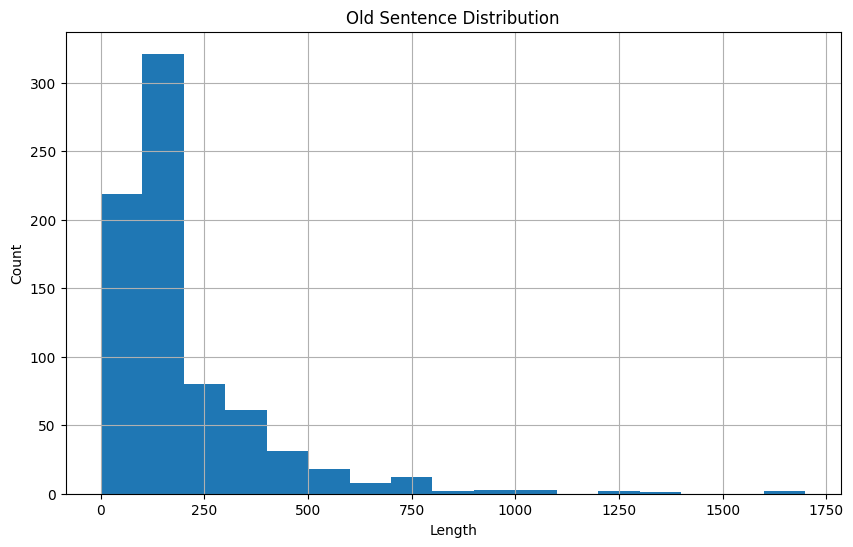

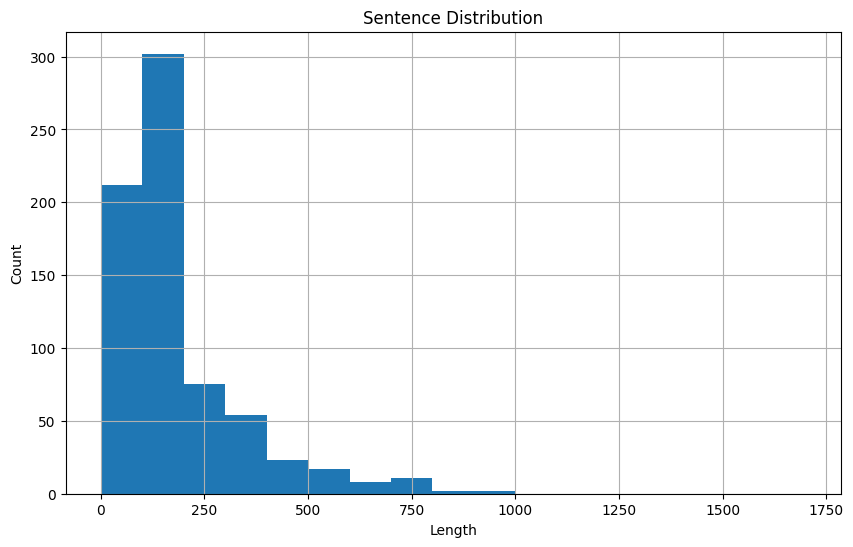

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(old_sentence, bins=range(0, 1800, 100))
plt.title('Old Sentence Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.hist(sentence, bins=range(0, 1800, 100))
plt.title('Sentence Distribution')
plt.xlabel('Length')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Save Process Dataset

In [11]:
all_data[:5]

[{'id': 'YypaFo0BUK9vqEvFhsqX',
  'reason': '偽造文書',
  'sentance': 150,
  'fact': '一、曹鳳珠與林寶櫳前為夫妻，因曹鳳珠認為林寶櫳與曹丞君間有不正常的交往關係，2人因此感情生變，遂於民國（下同）99年3月1日在福建連江地方法院調解離婚。詎曹鳳珠為取得保護及教養子女之權利，竟基於行使偽造私文書之犯意，先於某不詳時間、地點，偽造曹丞君簽名及日期94年5月10日之切結書（內容為本人曹丞君因與有婦之夫林寶櫳不正常的密切通聯，被林寶櫳老婆查獲，進而告之本人老公陳葦丞，為求兩家息事寧人，本人在媽媽及姐姐見證下，於姐姐家簽下切結書給林寶櫳老婆曹鳳珠，並保證今後不再與林寶櫳來往，若再被抓到願依妨害家庭處理，此致曹鳳珠）1份，再於99年5月3日，向福建連江地方法院具狀提出而行使之，希冀以此方式取得對子女保護及教養之權利，而足生損害於曹丞君。嗣因林寶櫳於99年5月5日在福建連江地方法院閱卷時，發現上開切結書而向曹丞君詢問，經曹丞君否認後，始查悉上情。二、曹鳳珠因認定係曹丞君介入其與林寶櫳間之婚姻，導致2人離婚，而對曹丞君心懷怨懟，竟基於毀損他人名譽之犯意，先後分別於99年11月5日凌晨4時43分許、100年1月10日上午10時2分許，在其位於連江縣南竿鄉馬祖村85號住處，以SKYPE網路帳號tina900928號，經由網路家庭國際資訊股份有限公司(即PChomeOnline)簡訊系統及米瑟奇網路簡訊平台散佈內容各為「號外！議會之光，春光外洩，曹妓員於11月5日凌晨二點，在神農山莊的休旅車上，與神農山莊王經理幽會長達兩個半小時......。」（下稱簡訊1）、「議員之恥！馬祖之惡！坐領高薪不夠用，議員兼作雞員，曹妓員1月8日深夜三點直奔神農山莊作應召，服務的對象是林姓警員，警紀敗壞蕩然無存；乾爹乾哥變成表哥表弟，破壞別人幸福家庭妻離子散，十惡不赦！罪大惡極！！正義之士群起躂閥！！」（下稱簡訊2）等涉及曹丞君私德而不具公共利益關聯性之事，足以詆毀曹丞君名譽之簡訊。嗣曹丞君陸續接獲他人來電告知收到上開簡訊，始知悉上情。三、案經曹丞君分別告訴及訴由福建省連江縣警察局移送福建連江地方法院檢察署檢察官偵查起訴。理由一、按被告以外之人於審判外之陳述，雖不符刑事訴訟法第159條之1至第159條之4之規定，而經當事人於審判程序

In [12]:
import random

random.shuffle(all_data)
all_data[:5]

[{'id': 'SlU-F40BlrB_n9qTlLQf',
  'reason': '偽造文書',
  'sentance': 120,
  'fact': '一、陳泰龍明知其與泰國籍女子陳玉婉（泰國名字為JARUWANWONGPRATOOM，陳玉婉涉嫌本案偽造文書部分，另經臺灣臺南地方法院檢察署檢察官通緝中）間並無結婚之真意，然因詹巧薇、張晉源等人欲找臺灣男子前往泰國與泰國女子辦理假結婚，林清水負責介紹臺灣男子予詹巧薇、張晉源等人以賺取新臺幣（下同）1萬元之仲介費，適陳泰龍依林清水於報紙上刊登之徵人廣告應徵時，由林清水告知泰國女子欲以假結婚之方式申請來臺居留工作，其若擔任假結婚之人頭老公，除不用負擔前往泰國之食宿、機票費用外，尚可獲取5、6萬元之報酬，迨陳泰龍應允同意後，林清水將其轉介紹予詹巧薇、張晉源等人，陳泰龍遂與林清水、詹巧薇、張晉源等人共同基於行使使公務員登載不實公文書之概括犯意聯絡，先由陳泰龍依指示於民國93年4月3日前往泰國，並於同年月7日與陳玉婉在泰國曼谷市法拉坎農區註冊辦事處登記結婚，取得上開註冊辦事處核發之結婚登記書、結婚證書等文件後，陳泰龍即行返臺，並於同年5月19日持經我國駐泰國臺北經濟文化辦事處認證之上開結婚登記書、結婚證書等資料，至臺南縣永康市（改制前稱謂，以下沿用舊制稱謂）戶政事務所填寫結婚登記申請書，申請辦理其與陳玉婉之結婚登記，因此使上開戶政事務所僅有形式審查權之承辦公務員陷於錯誤，於形式上審核後，將陳泰龍與陳玉婉於93年4月7日結婚之不實事項，登載於其職務上所掌屬公文書之戶籍登記資料內，並據以核發戶籍謄本，而足以生損害於戶政機關對於戶政管理及戶籍登記資料維護之正確性。迨陳玉婉來臺後，為取得居留身分，再由陳泰龍、陳玉婉承前概括之犯意聯絡，於同年6月14日及94年5月5日，均持前開登載不實之戶籍謄本等資料，先後向臺南縣政府警察局外事課申請核發陳玉婉之外僑居留證及申請居留證延期而連續行使之（業經檢察官當庭補充），經承辦人員實質審查結果，均未發覺陳泰龍與陳玉婉假結婚之實情，而發給陳玉婉居留證或核准延期，各足以生損害於主管機關對外僑居留管理之正確性。二、案經臺南市警察局（現改制為臺南市政府警察局，以下沿用舊制稱謂）第一分局報告臺灣臺南地方法院檢察署檢察官偵查起訴。理由甲、程序方面：一、本件以下所引用具傳聞證據性質之供述證據，因本件被告陳

In [13]:
train_data = all_data[:500]
test_data = all_data[500:600]
val_data = all_data[600:]

with open('dataset/train_data.json', 'w', encoding='utf-8') as f:
    json.dump(train_data, f, ensure_ascii=False, indent=4)

with open('dataset/test_data.json', 'w', encoding='utf-8') as f:
    json.dump(test_data, f, ensure_ascii=False, indent=4)

with open('dataset/val_data.json', 'w', encoding='utf-8') as f:
    json.dump(val_data, f, ensure_ascii=False, indent=4)